In [ ]:
!pip install PM4Py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pm4py
import pandas as pd
from PIL import Image
import numpy as np

In [ ]:
log = pm4py.read_xes('/content/drive/MyDrive/CourseProject/Test_1/Response_Never_Log.xes')
log

parsing log, completed traces ::   0%|          | 0/100 [00:00<?, ?it/s]

,concept:instance,lifecycle:transition,concept:name,concept:simulated,time:timestamp,case:concept:name,case:simulated:logProbability
0,0,complete,Start,True,2023-03-22 07:16:04.133000+00:00,0,-1.386294
1,0,complete,Ist,True,2023-03-22 07:17:04.133000+00:00,0,-1.386294
2,0,complete,Icmp,True,2023-03-22 07:18:04.133000+00:00,0,-1.386294
3,0,complete,End,True,2023-03-22 07:19:04.133000+00:00,0,-1.386294
4,1,complete,Start,True,2023-03-22 07:16:48.008000+00:00,1,-1.386294
...,...,...,...,...,...,...,...
588,99,complete,Start,True,2023-03-22 08:50:37.506000+00:00,99,-2.484907
589,99,complete,Ist,True,2023-03-22 08:51:37.506000+00:00,99,-2.484907
590,99,complete,A,True,2023-03-22 08:52:37.506000+00:00,99,-2.484907
591,99,complete,Icmp,True,2023-03-22 08:53:37.506000+00:00,99,-2.484907


In [ ]:
log = pm4py.read_xes('/content/drive/MyDrive/CourseProject/Test_1/Response_Never_Log.xes')
log["concept:instance"]=log["concept:instance"].apply(str)
log["concept:name"]=log["concept:name"].apply(str)
log['time:timestamp']= pd.to_datetime(log['time:timestamp'])
log = log[['concept:instance', 'concept:name', 'time:timestamp']]
log = log.rename(columns={"concept:instance": "CaseID", "concept:name": "Activity_Name", "time:timestamp": "CompleteTimestamp"})

parsing log, completed traces ::   0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
log.head()

,CaseID,Activity_Name,CompleteTimestamp
0,0,Start,2023-03-22 07:16:04.133000+00:00
1,0,Ist,2023-03-22 07:17:04.133000+00:00
2,0,Icmp,2023-03-22 07:18:04.133000+00:00
3,0,End,2023-03-22 07:19:04.133000+00:00
4,1,Start,2023-03-22 07:16:48.008000+00:00


In [ ]:
event_log = log[['Activity_Name', 'CaseID', 'CompleteTimestamp']].copy()
case_log = event_log.query("CaseID == '26'")
case_log.sort_values(by=['CompleteTimestamp'])

,Activity_Name,CaseID,CompleteTimestamp
144,Start,26,2023-03-22 07:40:04.536000+00:00
145,Ist,26,2023-03-22 07:41:04.536000+00:00
146,Omega,26,2023-03-22 07:42:04.536000+00:00
147,B,26,2023-03-22 07:43:04.536000+00:00
148,B,26,2023-03-22 07:44:04.536000+00:00
149,Omega,26,2023-03-22 07:45:04.536000+00:00
150,Omega,26,2023-03-22 07:46:04.536000+00:00
151,A,26,2023-03-22 07:47:04.536000+00:00
152,Icmp,26,2023-03-22 07:48:04.536000+00:00
153,End,26,2023-03-22 07:49:04.536000+00:00


In [ ]:
prefix_traces_act = []

for i in range(1, len(case_log)+1):
  #prefix_traces_act.append(pm4py.get_prefixes_from_log(case_log, length=i, case_id_key="CaseID")) ## Тут не правильно, что сохраняется ещё фраза activityNameEN и чиселка 
  prefix_traces_act.append( case_log['Activity_Name'].values[0:i] )

prefix_trace_num = len(prefix_traces_act)

prefix_traces_act

[array(['Start'], dtype=object),
 array(['Start', 'Ist'], dtype=object),
 array(['Start', 'Ist', 'Omega'], dtype=object),
 array(['Start', 'Ist', 'Omega', 'B'], dtype=object),
 array(['Start', 'Ist', 'Omega', 'B', 'B'], dtype=object),
 array(['Start', 'Ist', 'Omega', 'B', 'B', 'Omega'], dtype=object),
 array(['Start', 'Ist', 'Omega', 'B', 'B', 'Omega', 'Omega'], dtype=object),
 array(['Start', 'Ist', 'Omega', 'B', 'B', 'Omega', 'Omega', 'A'],
       dtype=object),
 array(['Start', 'Ist', 'Omega', 'B', 'B', 'Omega', 'Omega', 'A', 'Icmp'],
       dtype=object),
 array(['Start', 'Ist', 'Omega', 'B', 'B', 'Omega', 'Omega', 'A', 'Icmp',
        'End'], dtype=object)]

In [ ]:
# получаем уникальные активити
activities = list(event_log['Activity_Name'].unique())
act_dict = {}

# проводим соответствие между номером и активити
act_num = len(activities)
for i in range(act_num):
  act_dict[activities[i]] = i

In [ ]:
# Получаем матрицу по каналу activity

case_log_len = len(case_log)
matrix = [ [0]*act_num for i in range(case_log_len)]


for i in range(prefix_trace_num):
  for act in prefix_traces_act[i]:
    act_index = act_dict[act]
    matrix[i][act_index] += 1

matrix

[[1, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 0, 0, 0, 0],
 [1, 1, 0, 0, 1, 0, 0],
 [1, 1, 0, 0, 1, 0, 1],
 [1, 1, 0, 0, 1, 0, 2],
 [1, 1, 0, 0, 2, 0, 2],
 [1, 1, 0, 0, 3, 0, 2],
 [1, 1, 0, 0, 3, 1, 2],
 [1, 1, 1, 0, 3, 1, 2],
 [1, 1, 1, 1, 3, 1, 2]]

[[ 85   0   0   0   0   0   0]
 [ 85  85   0   0   0   0   0]
 [ 85  85   0   0  85   0   0]
 [ 85  85   0   0  85   0  85]
 [ 85  85   0   0  85   0 170]
 [ 85  85   0   0 170   0 170]
 [ 85  85   0   0 255   0 170]
 [ 85  85   0   0 255  85 170]
 [ 85  85  85   0 255  85 170]
 [ 85  85  85  85 255  85 170]]


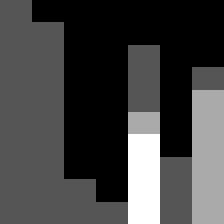

In [ ]:
np_matrix = np.asmatrix(matrix)
np_matrix = np_matrix.astype("uint8")
norm_matrix = np_matrix.copy()
norm_matrix *= 255.0/norm_matrix.max()
#norm_matrix = np_matrix * 255.0/np_matrix.max()
print(norm_matrix)
A = np.squeeze(np.asarray(norm_matrix)) 
img = Image.fromarray(A)

#VGG model expects the images it receives to be 224x224 NumPy arrays
img = img.resize((224, 224),Image.NEAREST)
index = 1
# path_to_dir = '/content/drive/MyDrive/CourseProject/Test_1/Images'
# path = path_to_dir + "/image_" + str(index) + ".png"
# img.save(path)
img